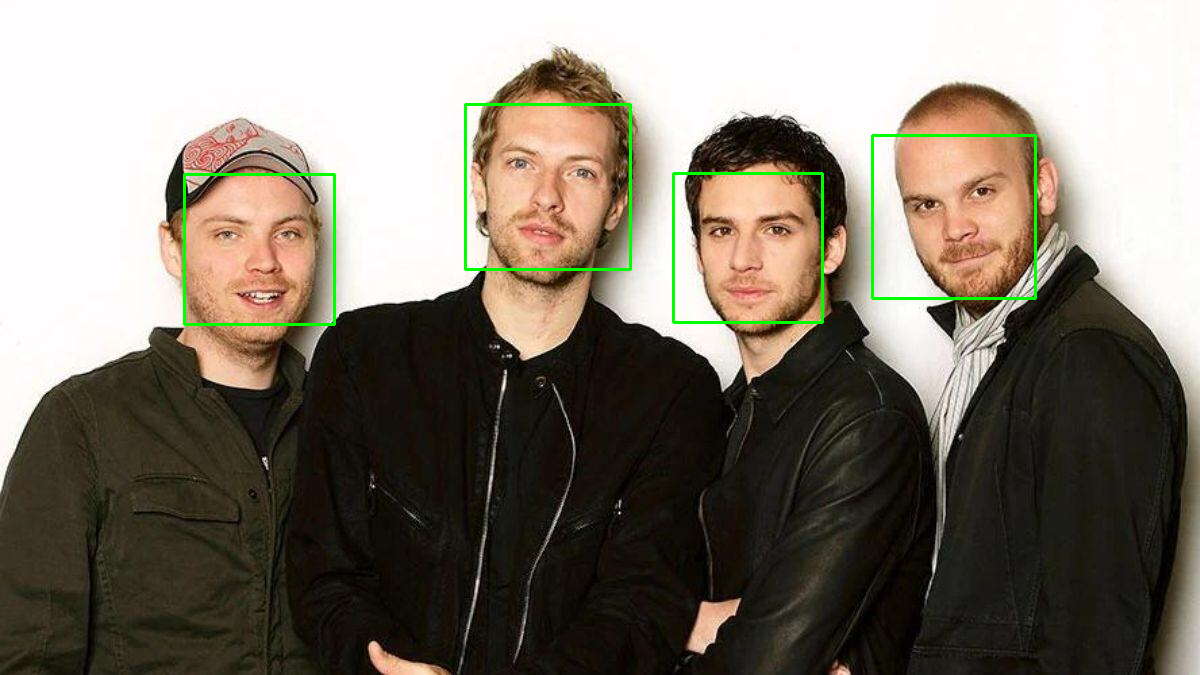

In [18]:
# face detection by Haar features

import cv2 as cv
import os
from google.colab.patches import cv2_imshow

# Read image from your local file system
# original_image = cv.imread('kid.jpg')
original_image = cv.imread('moreFaces.jpg')
# original_image = cv.imread('faceByGlasses.jpg')

# Convert color image to grayscale for Viola-Jones
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Load the classifier and create a cascade object for face detection
face_cascade = cv.CascadeClassifier(os.path.dirname(
    cv.__file__) + '/data/haarcascade_frontalface_alt.xml')

detected_faces = face_cascade.detectMultiScale(grayscale_image)

# view detections
for (column, row, width, height) in detected_faces:
    cv.rectangle(
        original_image,
        (column, row),
        (column + width, row + height),
        (0, 255, 0),
        2
    )

cv2_imshow(original_image)


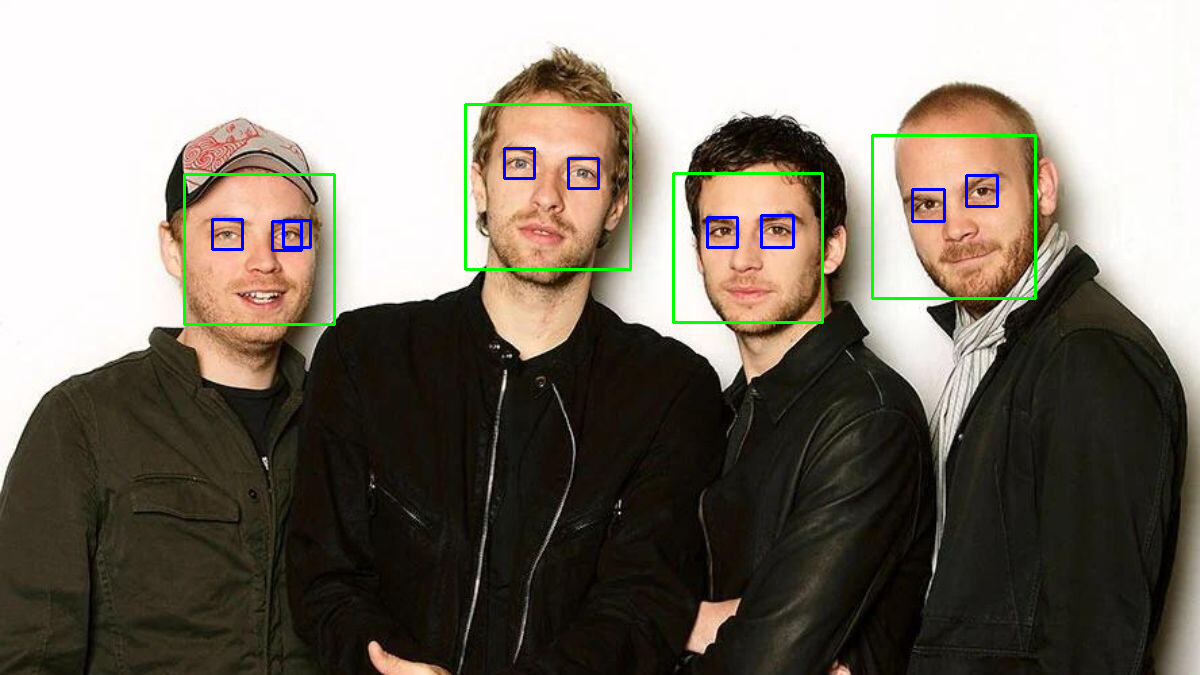

In [19]:
eye_cascade = cv.CascadeClassifier(os.path.dirname(
    cv.__file__) + '/data/haarcascade_eye_tree_eyeglasses.xml')


# view detections
for (column, row, width, height) in detected_faces:
    cv.rectangle(
        original_image,
        (column, row),
        (column + width, row + height),
        (0, 255, 0),
        2
    )

for (column, row, width, height) in eye_cascade.detectMultiScale(grayscale_image):
    cv.rectangle(
        original_image,
        (column, row),
        (column + width, row + height),
        (255, 0, 0),
        2
    )

cv2_imshow(original_image)

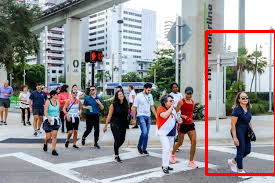

In [20]:
# person detection by HOG&SVM

import imutils

# Initializing the HOG person
# detector
hog = cv.HOGDescriptor()
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())

# Reading the Image
# original_image = cv.imread('onePedestrian2.jpg')
original_image = cv.imread('morePedestrians3.jpg')

# Resizing the Image
resized_image = imutils.resize(original_image, width=min(400, original_image.shape[1]))

# Detecting all the regions in an image that has pedestrians
# check the scale param
(regions, _) = hog.detectMultiScale(resized_image,
                                    winStride=(4, 4),
                                    padding=(4, 4),
                                    scale=1.05)

# Drawing the regions in the image
for (x, y, w, h) in regions:
    cv.rectangle(resized_image, (x, y),
                  (x + w, y + h),
                  (0, 0, 255), 2)

# Showing the output Image

cv2_imshow(resized_image)

